<a href="https://colab.research.google.com/github/Laraib-o-Hussain/Machine-Learning/blob/main/SVM_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center">Assignment 3: SVM Kernel Selection</h1>
<h1 align="center">Submitted by: Laraib Hussain, F2021266614</h1>

Dataset Preview:
   Gender  Age  EstimatedSalary  Purchased
0    Male   19            19000          0
1    Male   35            20000          0
2  Female   26            43000          0
3  Female   27            57000          0
4    Male   19            76000          0

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB
None

Summary Statistics:
              Age  EstimatedSalary   Purchased
count  400.000000       400.000000  400.000000
mean    37.655000     69742.500000    0.357500
std     10.482877     34096.960282    0.479864
min     18.000000     15000.000000    0.000000
25%     29.750000     43

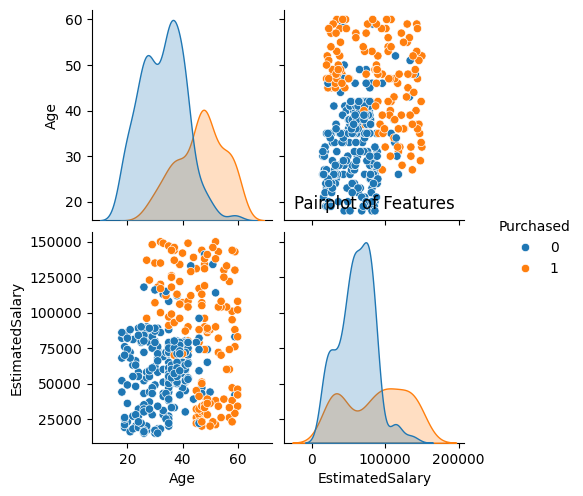

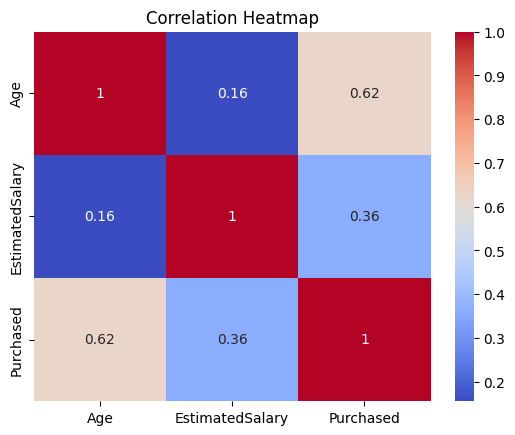


Missing Values:
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

Preprocessed Dataset:
   Gender       Age  EstimatedSalary  Purchased
0       1 -1.781797        -1.490046          0
1       1 -0.253587        -1.460681          0
2       0 -1.113206        -0.785290          0
3       0 -1.017692        -0.374182          0
4       1 -1.781797         0.183751          0
Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ..................

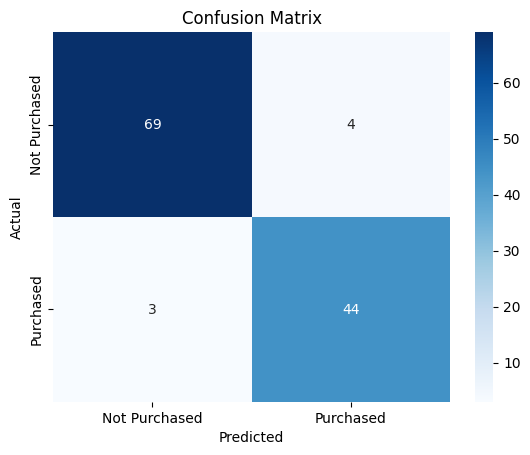


Model saved as 'svm_model.pkl'


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


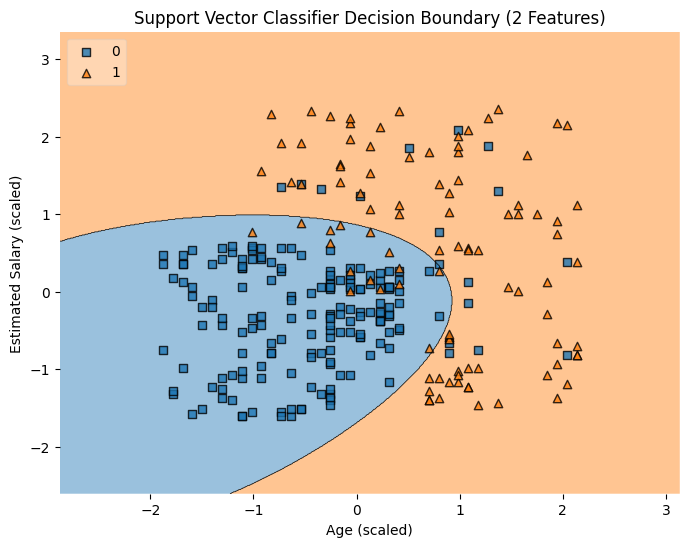

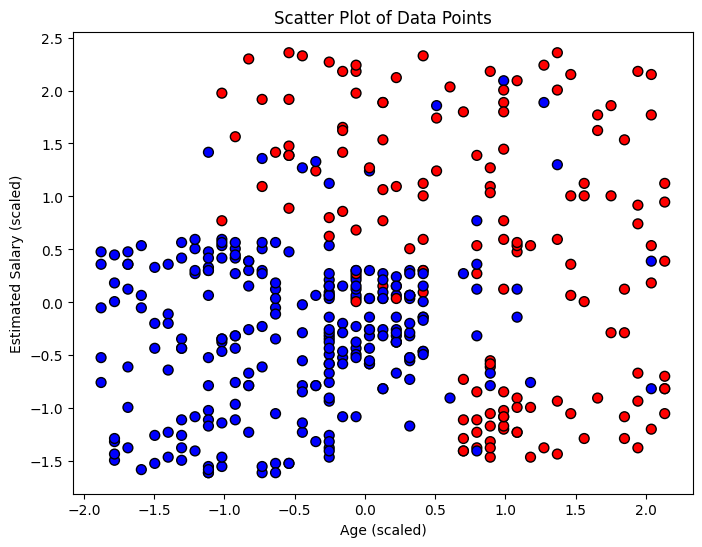

['scaler.pkl']

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import joblib
from mlxtend.plotting import plot_decision_regions

data = pd.read_csv('User_Data.csv')
print("Dataset Preview:")
print(data.head())

print("\nDataset Info:")
print(data.info())

print("\nSummary Statistics:")
print(data.describe())


sns.pairplot(data, hue='Purchased')
plt.title("Pairplot of Features")
plt.show()


numeric_data = data.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


print("\nMissing Values:")
print(data.isnull().sum())
data = data.dropna()


encoder = LabelEncoder()
data['Gender'] = encoder.fit_transform(data['Gender'])


scaler = StandardScaler()
data[['Age', 'EstimatedSalary']] = scaler.fit_transform(data[['Age', 'EstimatedSalary']])

print("\nPreprocessed Dataset:")
print(data.head())

X = data.drop('Purchased', axis=1)
y = data['Purchased']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1],
    'kernel': ['linear', 'rbf', 'poly']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5, scoring='accuracy', verbose=2)
grid.fit(X_train, y_train)

print("\nBest Hyperparameters:")
print(grid.best_params_)

best_model = grid.best_estimator_
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Purchased', 'Purchased'], yticklabels=['Not Purchased', 'Purchased'])
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

joblib.dump(best_model, 'svm_Model.pkl')
print("\nModel saved as 'svm_model.pkl'")

X_plot = data[['Age', 'EstimatedSalary']]  # Keep only two features
y_plot = data['Purchased']

X_train_plot, X_test_plot, y_train_plot, y_test_plot = train_test_split(X_plot, y_plot, test_size=0.3, random_state=42)

best_model_2d = SVC(C=grid.best_params_['C'],
                    gamma=grid.best_params_['gamma'],
                    kernel=grid.best_params_['kernel'])
best_model_2d.fit(X_train_plot, y_train_plot)

X_train_plot_np = X_train_plot.values
y_train_plot_np = y_train_plot.values

plt.figure(figsize=(8, 6))
plot_decision_regions(X=X_train_plot_np, y=y_train_plot_np, clf=best_model_2d, legend=2)
plt.xlabel('Age (scaled)')
plt.ylabel('Estimated Salary (scaled)')
plt.title('Support Vector Classifier Decision Boundary (2 Features)')
plt.show()
plt.figure(figsize=(8, 6))
plt.scatter(X['Age'], X['EstimatedSalary'], c=y, cmap='bwr', s=50, edgecolor='k')
plt.xlabel('Age (scaled)')
plt.ylabel('Estimated Salary (scaled)')
plt.title('Scatter Plot of Data Points')
plt.show()
import joblib
joblib.dump(scaler, 'scaler.pkl')  # Save the scaler


In [ ]:
!jupyter nbconvert --to html "LaraibHussain,F2021266614.ipynb"


[NbConvertApp] Converting notebook LaraibHussain,F2021266614.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 5 image(s).
[NbConvertApp] Writing 719547 bytes to LaraibHussain,F2021266614.html


In [ ]:
pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 53.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 61.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.3 MB/s eta 0:00:00


In [ ]:
pip install pandas matplotlib seaborn scikit-learn mlxtend joblib


In [ ]:
!pip install streamlit
!pip install localtunnel


ERROR: Could not find a version that satisfies the requirement localtunnel (from versions: none)
ERROR: No matching distribution found for localtunnel


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler

# Load the trained SVM model and scaler
model = joblib.load('svm_Model.pkl')
scaler = joblib.load('scaler.pkl')  # Make sure you saved the scaler

# Streamlit UI
st.title("Customer Purchase Prediction")

# User input fields
gender = st.selectbox("Gender", ["Male", "Female"])
age = st.slider("Age", min_value=18, max_value=100, value=25)
estimated_salary = st.number_input("Estimated Salary", min_value=0, max_value=150000, value=50000)

# Process input data
gender_encoded = 1 if gender == 'Female' else 0
input_data_unscaled = np.array([[age, estimated_salary]])  # Remove Gender
input_data_scaled = scaler.transform(input_data_unscaled)  # Scale numeric features
gender_encoded_reshaped = np.array([[gender_encoded]])  # Convert gender to 2D
input_data_final = np.hstack((gender_encoded_reshaped, input_data_scaled))  # Combine all features

# Predict button
if st.button("Predict"):
    prediction = model.predict(input_data_final)
    result = "Purchased" if prediction[0] == 1 else "Not Purchased"
    st.write(f"### Prediction: {result}")


Writing app.py


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501
